### HR Analytics Employee Attrition - Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
data = pd.read_csv('Project_Data/IBM-HR-Employee-Attrition.csv') #load data
data.head(5) #display first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape #number of observations (1470 samples, 35 columns)

(1470, 35)

In [4]:
data.columns #columns name

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#drop some unmeaningful data
data.drop(['EmployeeNumber','StandardHours'],axis=1,inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#check for null values
100*data.isnull().sum()/data.shape[0] #data has no missing values

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInCurrentRole          0.0
YearsSin

In [7]:
data.describe() #describe numeric data fields

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Number of active and inactive employee by departments
pd.pivot_table(data, index = 'Attrition', values = 'EmployeeCount', columns = ['Department'],aggfunc = 'count')

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [9]:
#Another way to display number of active and inactive employee by departments
data[['Attrition','Department','EmployeeCount']].groupby(
    ['Department','Attrition'],as_index=True).count().sort_values(by='Department',ascending=False)

EmployeeCount
Department             Attrition               
Sales                  No                   354
                       Yes                   92
Research & Development No                   828
                       Yes                  133
Human Resources        No                    51
                       Yes                   12

In [10]:
#Average monthly income of active and inactive employee
#Active employee had a higher average monthly income
pd.pivot_table(data, index = 'Attrition',values = ['MonthlyIncome','EmployeeCount'])

,EmployeeCount,MonthlyIncome
Attrition,,
No,1,6832.739659
Yes,1,4787.092827


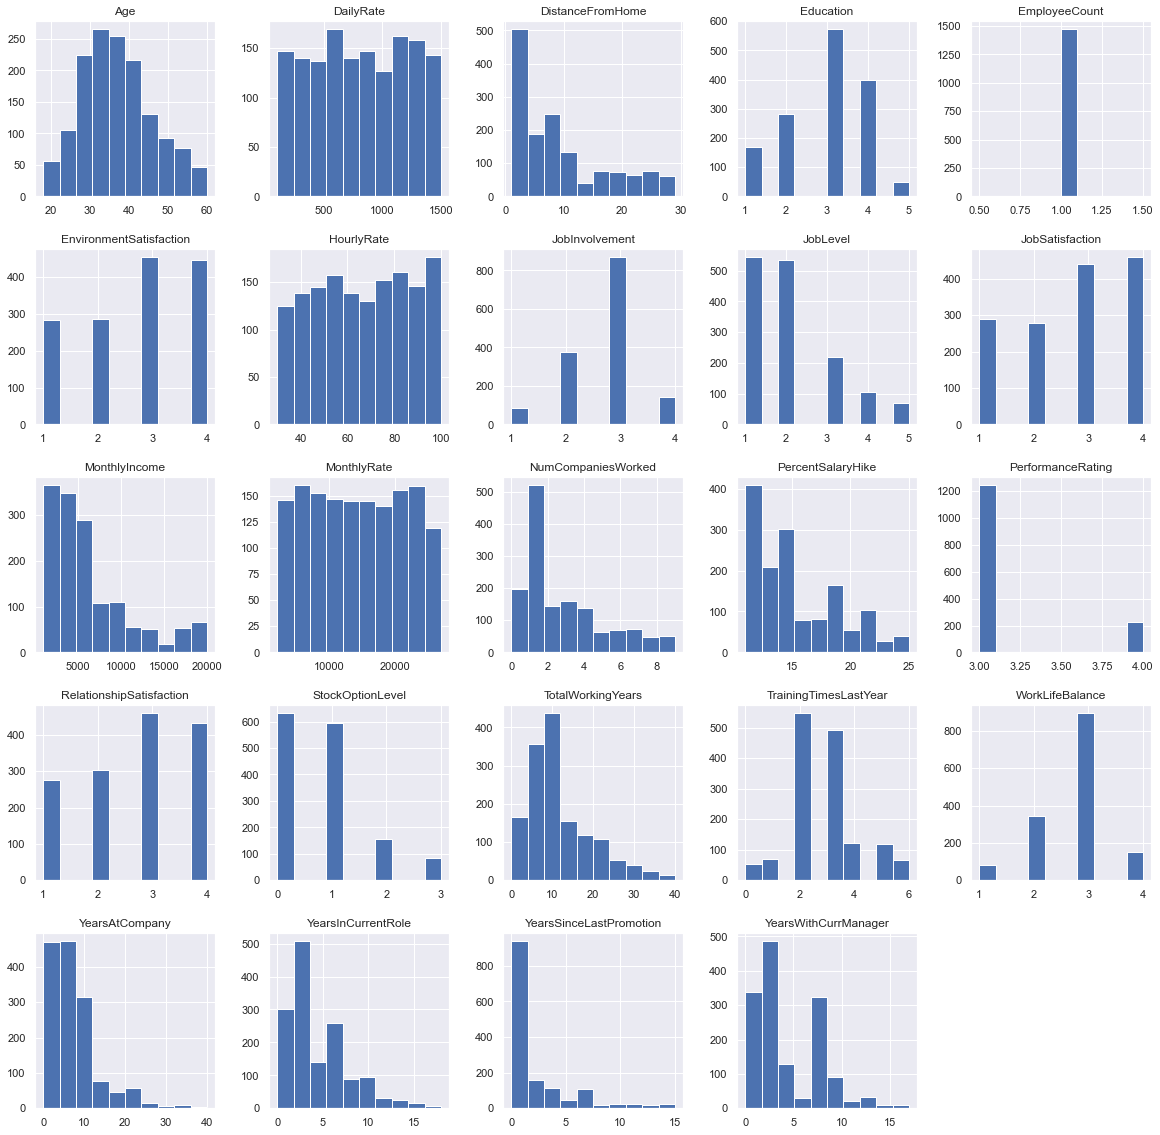

In [11]:
data.hist(figsize=(20,20)) #frequency distribution for numeric data fields
plt.show()

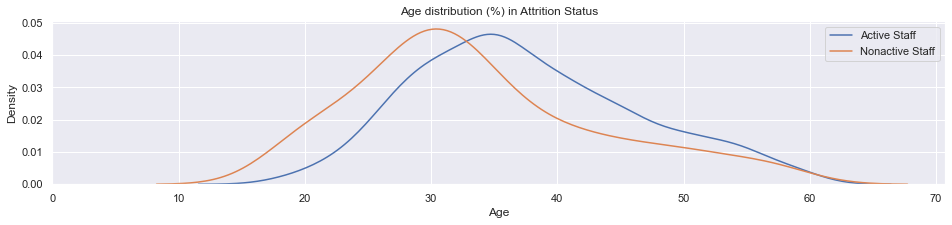

In [12]:
#Younger people quit more
plt.figure(figsize=(16,3))
sns.kdeplot(data.loc[data['Attrition']=='No', 'Age'],label='Active Staff')
sns.kdeplot(data.loc[data['Attrition']=='Yes','Age'],label='Nonactive Staff')
plt.title('Age distribution (%) in Attrition Status')
plt.xlabel('Age')
plt.legend()

plt.xlim(left=0)
plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

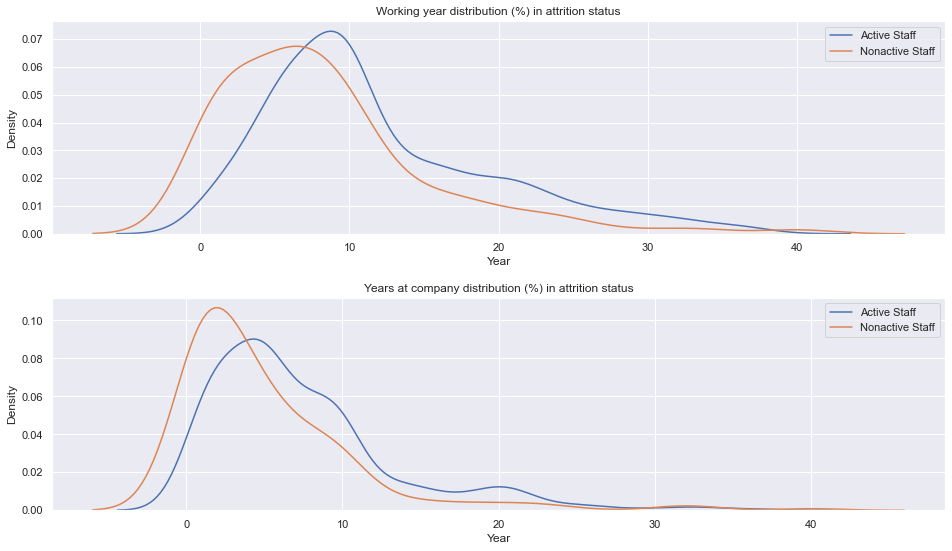

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(16,9))

#Younger people quit more
sns.kdeplot(data.loc[data['Attrition']=='No', 'TotalWorkingYears'],label='Active Staff',ax=ax1)
sns.kdeplot(data.loc[data['Attrition']=='Yes','TotalWorkingYears'],label='Nonactive Staff',ax=ax1)
ax1.set_title('Working year distribution (%) in attrition status')
ax1.set_xlabel('Year')
ax1.legend()

#Lower monthly income staff quit more
sns.kdeplot(data.loc[data['Attrition']=='No', 'YearsAtCompany'],label='Active Staff',ax=ax2)
sns.kdeplot(data.loc[data['Attrition']=='Yes','YearsAtCompany'],label='Nonactive Staff',ax=ax2)
ax2.set_title('Years at company distribution (%) in attrition status')
ax2.set_xlabel('Year')
ax2.legend()

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

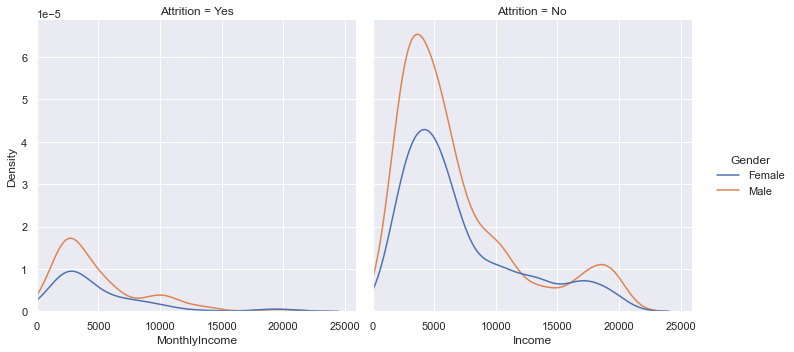

In [14]:
#Staffs tended to quit peak at year 5
sns.displot(data = data, x='MonthlyIncome',col='Attrition',kind = 'kde',hue='Gender')
plt.xlabel('Income')
plt.xlim(left=0)
plt.show()

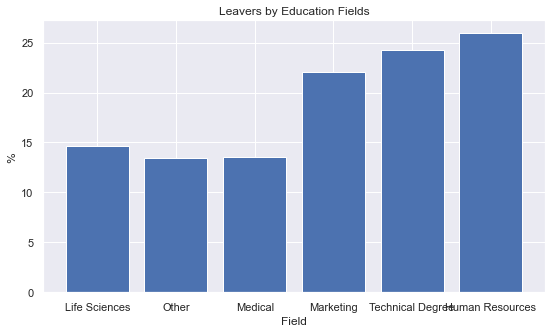

In [15]:
#Leavers by Education
x = {}
for i in data['EducationField'].unique():
    re = data[(data['EducationField']==i)&(data['Attrition']=="Yes")].shape[0]/data[data['EducationField']==i].shape[0]
    x[i] = re*100

plt.figure(figsize=(9,5))
plt.bar(*zip(*x.items()))
plt.title('Leavers by Education Fields')
plt.xlabel('Field')
plt.ylabel('%')
plt.show()

<Figure size 1152x288 with 0 Axes>

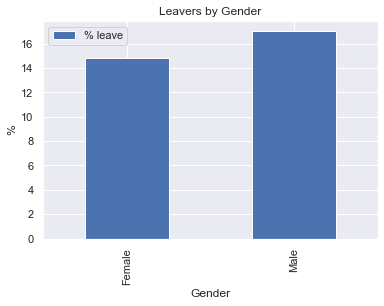

In [16]:
#Leavers by Gender
df_leaver = pd.DataFrame(columns = ['Gender','% leave'])
n =0
for i in data['Gender'].unique():
    re = data[(data['Gender']==i)&(data['Attrition']=="Yes")].shape[0]/data[data['Gender']==i].shape[0]
    df_leaver.loc[n] = (i,re*100)
    n += 1
    
plt.figure(figsize=(16,4))
df_gen = df_leaver.groupby(by='Gender').sum()
df_gen.plot(kind='bar',title='Leavers by Gender')
plt.xlabel('Gender')
plt.ylabel('%')

plt.show()

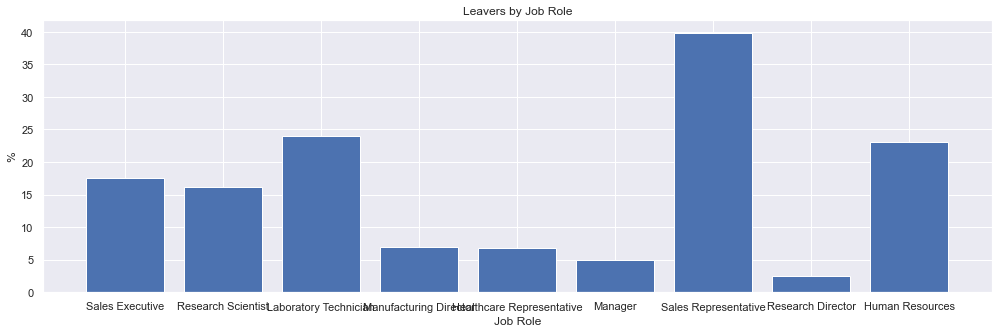

In [17]:
#leaver by job roles
x = {}
for i in data['JobRole'].unique():
    re = data[(data['JobRole']==i)&(data['Attrition']=="Yes")].shape[0]/data[data['JobRole']==i].shape[0]
    x[i] = re*100

plt.figure(figsize=(17,5))
plt.bar(*zip(*x.items()))
plt.title('Leavers by Job Role')
plt.xlabel('Job Role')
plt.ylabel('%')
plt.show()

In [18]:
# Find correlations with the target and sort
df_HR = data.copy()
df_HR.drop(['EmployeeCount'],axis=1,inplace=True)
df_HR['Target'] = df_HR['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_HR = df_HR.drop(['Attrition'], axis=1)
correlations = df_HR.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


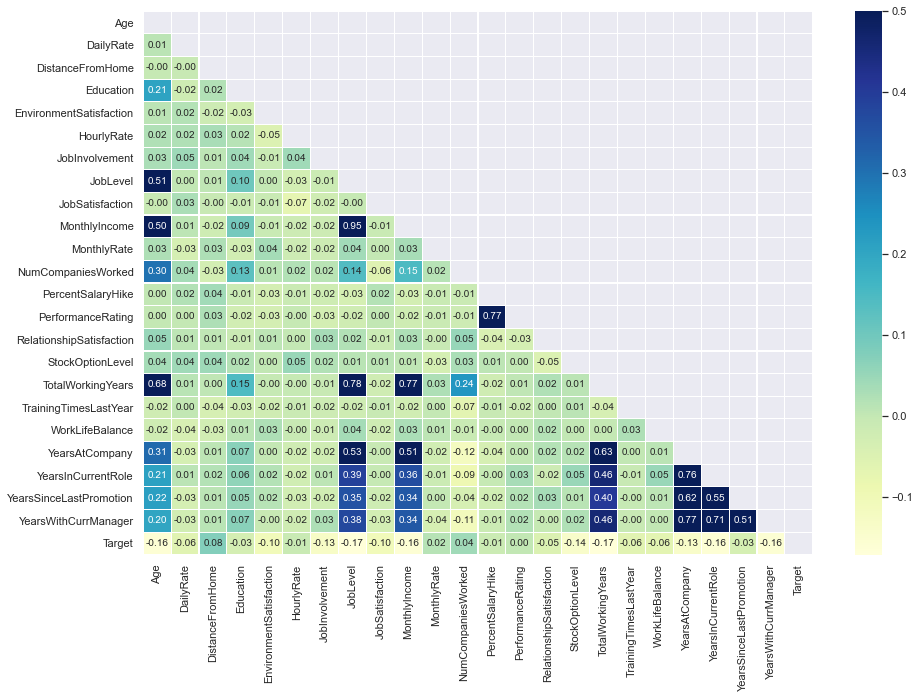

In [19]:
# Calculate correlations
corr = df_HR.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,vmax=.5,
            mask=mask, annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()